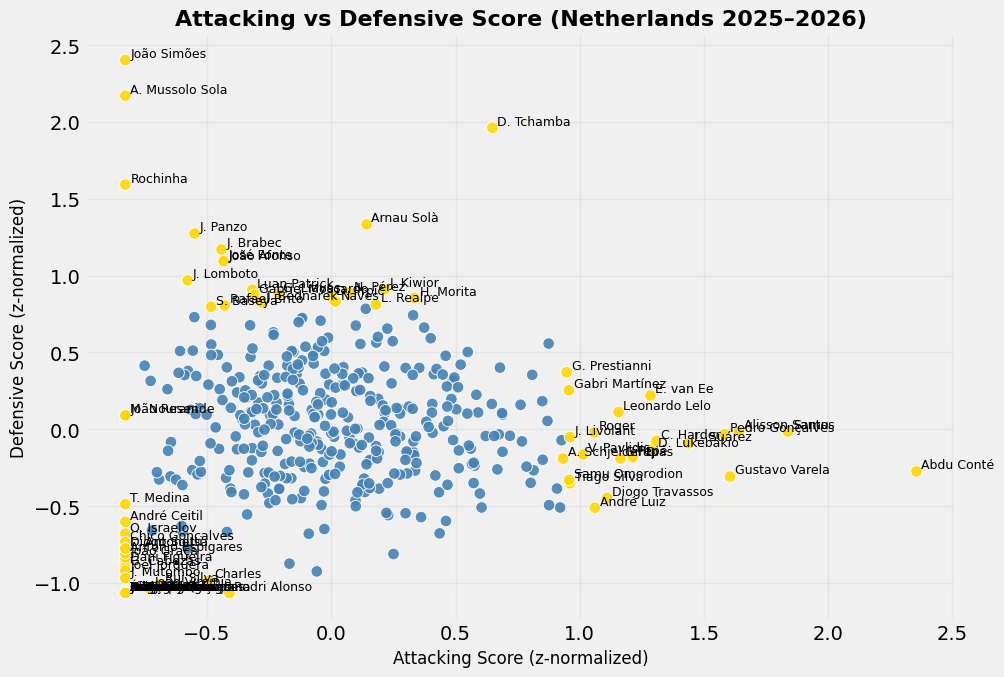


✅ Scatterplot saved to: /Users/user/Downloads/attacking_vs_defensive_scatter.png


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

# === Load Excel ===
file_path = "/Users/user/Downloads/Portugal 2025-2026.xlsx"
df = pd.read_excel(file_path)

# === Define position groups ===
def position_group(pos):
    defenders = ["LB", "LCB", "CB", "RCB", "RB", "LWB", "RWB"]
    midfielders = ["RDMF", "LDMF", "RAMF", "LAMF", "AMF", "LCMF", "RCMF"]
    attackers = ["CF", "LW", "RW"]
    if pos in defenders:
        return "Defenders"
    elif pos in midfielders:
        return "Midfielders"
    elif pos in attackers:
        return "Attackers"
    else:
        return "Other"

df["Group"] = df["Position"].apply(position_group)

# === Define metrics ===
attacking_metrics = [
    "Goals per 90", "Assists per 90", "xA per 90", "xG per 90",
    "Passes to final third per 90", "Passes to penalty area per 90",
    "Progressive passes per 90", "Touches in box per 90"
]

defensive_metrics = [
    "PAdj Sliding tackles", "PAdj Interceptions",
    "Aerial duels won, %", "Defensive duels won, %",
    "Shots blocked per 90"
]

# === Normalize metrics (z-score) ===
for col in attacking_metrics + defensive_metrics:
    df[col + "_z"] = stats.zscore(df[col].fillna(0))

# === Calculate aggregate scores ===
df["Attacking_score"] = df[[c + "_z" for c in attacking_metrics]].mean(axis=1)
df["Defensive_score"] = df[[c + "_z" for c in defensive_metrics]].mean(axis=1)

# === FiveThirtyEight style ===
plt.style.use('fivethirtyeight')

# === Identify outliers (top/bottom 5%) ===
x_low, x_high = df["Attacking_score"].quantile([0.05, 0.95])
y_low, y_high = df["Defensive_score"].quantile([0.05, 0.95])

df["Outlier"] = (
    (df["Attacking_score"] <= x_low) | (df["Attacking_score"] >= x_high) |
    (df["Defensive_score"] <= y_low) | (df["Defensive_score"] >= y_high)
)

# === Scatterplot ===
plt.figure(figsize=(10, 7))
colors = df["Outlier"].map({True: "gold", False: "steelblue"})

plt.scatter(
    df["Attacking_score"], df["Defensive_score"],
    c=colors, s=70, edgecolor="white", linewidth=0.7, alpha=0.9
)

# === Labels and title ===
plt.title("Attacking vs Defensive Score (Netherlands 2025–2026)", fontsize=16, weight='bold')
plt.xlabel("Attacking Score (z-normalized)", fontsize=12)
plt.ylabel("Defensive Score (z-normalized)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# === Label outliers ===
for _, row in df[df["Outlier"]].iterrows():
    plt.text(row["Attacking_score"] + 0.02,
             row["Defensive_score"] + 0.02,
             row["Player"], fontsize=9, color='black')

# === Save and show ===
out_dir = os.path.dirname(file_path)
chart_path = os.path.join(out_dir, "attacking_vs_defensive_scatter.png")
plt.savefig(chart_path, dpi=300)
plt.show()

print(f"\n✅ Scatterplot saved to: {chart_path}")
